In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def get_features(link):
    feats = []
    f = open(link)
    for l in f.readlines():
        feats.append([float(b) for b in l.split(',')])
    return np.array(feats)

def get_labels(link):
    labels = []
    f=open(link)
    for l in f.readlines():
        labels += [float(l)]
    return np.array(labels)


def get_gradients(X,Y,w,b):
    projections = Y * (X @ w + b)
    matches = projections>=1 #these indicates all data points that are classified correctly
    w_gradients = -Y[:,None] * X
    w_gradients[matches]=0 #gradients for all correctly classified datapoints is 0
    b_gradient = -Y
    b_gradient[matches]=0
    return w_gradients, b_gradient

def single_update(X,Y,w,b,w_grad,b_grad,i,C,lr):
    w_cost_gradient = w + C * w_grad[i,:]
    b_cost_gradient = C * b_grad[i]
    w_new = w - lr * w_cost_gradient
    b_new = b - lr * b_cost_gradient
    return w_new, b_new

def update(X,Y,w,b,C,lr):
    w_grad,b_grad = get_gradients(X,Y,w,b) #get the individual gradients
    w_cost_gradient = (w + C * np.sum(w_grad,axis=0)) 
    b_cost_gradient = (C * np.sum(b_grad))
    w_new = w - lr * w_cost_gradient
    b_new = b - lr * b_cost_gradient
    return w_new, b_new

def minibatch_update(X,Y,w,b,w_grad,b_grad,C,lr,start,stop):
    w_cost_gradient = w + C * np.sum(w_grad[start:stop,:],axis=0)
    b_cost_gradient = C * np.sum(b_grad[start:stop])
    w_new = w - lr * w_cost_gradient
    b_new = b - lr * b_cost_gradient
    return w_new, b_new

def cost_function(X,Y,w,b,C):
    classifications = 1 - Y * (X @ w +b)
    classifications[classifications<0]=0
    cost = .5 * np.sum(w**2) + C *np.sum(classifications)
    return cost
    

def percent_diff(cost_old,cost_new):
    diff = np.abs(cost_old-cost_new)*100/cost_old
    return diff

def abs_diff(cost_old,cost_new,diff_old):
    perc = percent_diff(cost_old,cost_new)
    diff = .5*diff_old + .5*perc
    return diff

In [3]:
X = get_features('./data/features.txt')
Y = get_labels('./data/target.txt')

In [4]:
#init stuff for batch gradient
lr = 3e-7
thresh = .025
w = np.zeros(X.shape[1])
C=100
b = 0
cost = cost_function(X,Y,w,b,C)

In [5]:
time_sta = time.time()
costs_batch=[cost]
while True:
    w,b = update(X,Y,w,b,C,lr)
    new_cost = cost_function(X,Y,w,b,C)
    diff = percent_diff(cost,new_cost)
    cost=new_cost
    costs_batch.append(cost)
    if diff<thresh:
        break
time_batch = time.time()-time_sta

In [20]:
#init stuff for batch gradient
lr = .0001
thresh = .001
w = np.zeros(X.shape[1])
C=100
b = 0
cost = cost_function(X,Y,w,b,C)
diff = 0
shuffler = np.random.choice(Y.shape[0],Y.shape[0],replace=False)
X_sh = X[shuffler,:]
Y_sh = Y[shuffler]


In [21]:
i=0
time_sta = time.time()
costs_sto = [cost]
while True:
    w_grad,b_grad = get_gradients(X_sh,Y_sh,w,b)
    w,b = single_update(X_sh,Y_sh,w,b,w_grad,b_grad,i,C,lr)
    i = (i%(Y.shape[0]-1))+1
    new_cost = cost_function(X_sh,Y_sh,w,b,C)
    diff = abs_diff(cost,new_cost,diff)
    cost = new_cost
    costs_sto.append(cost)
    if diff<thresh:
        break
time_sto = time.time()-time_sta

In [17]:
#init stuff for minibatch gradient
lr = 1e-5
thresh = .01
B=20
w = np.zeros(X.shape[1])
C=100
bsize = 20
cost = cost_function(X,Y,w,b,C)
diff = 0
shuffler = np.random.choice(Y.shape[0],Y.shape[0],replace=False)
X_sh = X[shuffler]
Y_sh = Y[shuffler]

In [18]:
i=0
time_sta = time.time()
costs_mini = [cost]
while True:
    w_grad,b_grad = get_gradients(X_sh,Y_sh,w,b)
    start = int(i*bsize)
    stop = int((i+1)*bsize)
    w,b = minibatch_update(X_sh,Y_sh,w,b,w_grad,b_grad,C,lr,start,stop)
    i = (i+1)%(np.ceil((Y.shape[0]-1)/bsize))
    new_cost = cost_function(X_sh,Y_sh,w,b,C)
    diff = abs_diff(cost,new_cost,diff)
    cost = new_cost
    costs_mini.append(cost)
    if diff<thresh:
        break
time_mini = time.time()-time_sta

Text(0.5, 1.0, 'Comparison of different stochastic gradient approaches')

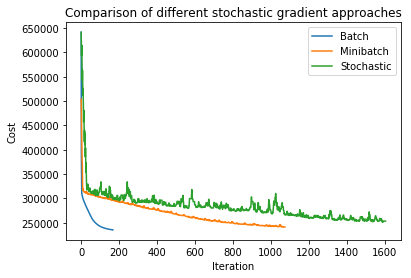

In [22]:
plt.plot(costs_batch,label='Batch')
plt.plot(costs_mini, label='Minibatch')
plt.plot(costs_sto,label='Stochastic')
plt.xlabel('Iteration')
plt.legend()
plt.ylabel('Cost')
plt.title('Comparison of different stochastic gradient approaches')

In [23]:
print('Elapsed time batch gradient:',time_batch)
print('Elapsed time stochastic gradient:',time_sto)
print('Elapsed time minibatch gradient:',time_mini)

Elapsed time batch gradient: 1.2876317501068115
Elapsed time stochastic gradient: 9.9448823928833
Elapsed time minibatch gradient: 6.61858868598938


In [16]:
###this is stuff for calculating the G scores

def  dd(d,l,r):
    return d*(1-(l**2+r**2))

def g(d,l,r):
    i_d = dd(100,.75,.25)
    idl = dd(d,l,r)
    idr= dd(100-d,l,r)
    return i_d - (idl+idr)

In [22]:
g(70,.86,.14)

13.419999999999987